In [16]:
pip install SPARQLWrapper

In [21]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb

**Getting all the European countries along with there population**

In [22]:
endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT 
  ?countryLabel ?population 
WHERE {
  ?country wdt:P463 wd:Q458.
  ?country wdt:P1082 ?population.
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)


def countries(results):
    country = []
    for result in results["results"]["bindings"]:
        country.append(result['countryLabel']['value'])
    return list(country)

def populations(results):
    population = []
    for result in results["results"]["bindings"]:
        population.append(int(result['population']['value']))
    return list(population)

In [23]:
c_list = countries(results)
p_list = populations(results)
data = pd.DataFrame(zip(c_list,p_list), columns=['countries','population'])
data.to_csv("Data.csv")
data

,countries,population
0,Ireland,4761865
1,Hungary,9769526
2,Spain,46733038
3,Belgium,11431406
4,Luxembourg,626108
5,Finland,5501043
6,Sweden,10409248
7,Denmark,5827463
8,Poland,38382576
9,Lithuania,2790842


**Plotting the graph of Population vs Countries**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


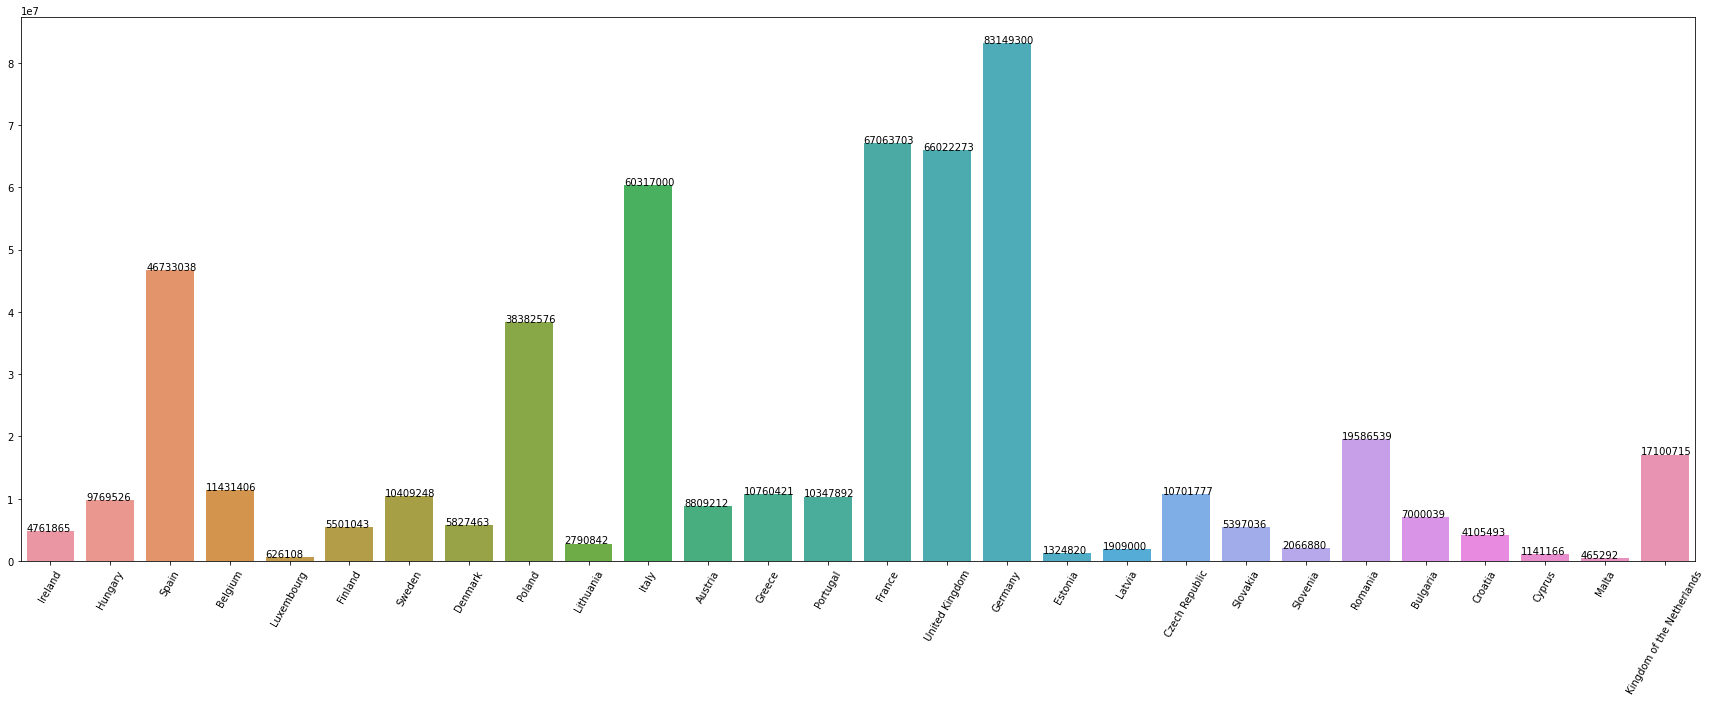

In [11]:
plt.figure(figsize=(30,10))
sb.barplot(c_list,p_list)
ax = plt.subplot(1,1,1)
ax.set_xticklabels(c_list, rotation = 60)
for i, v in enumerate(p_list):
     plt.text(i -0.4  , v + 1 , str(v))
plt.show()

**Getting Female Mayors**

In [19]:
endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT 
?capitalLabel ?mayorLabel
WHERE {
  ?country wdt:P463 wd:Q458.
  ?country wdt:P36 ?capital.
  ?mayor wdt:P21 wd:Q6581072.
  ?capital p:P6 ?statement.
  ?statement ps:P6 ?mayor.
  FILTER NOT EXISTS { ?statement pq:P582 ?end_date }
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
  }
}"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)
capital = []
mayor = []
for result in results["results"]["bindings"]:
    capital.append(result['capitalLabel']['value'])
    mayor.append(result['mayorLabel']['value'])
mayorData = pd.DataFrame(zip(capital,mayor),columns=['Capital','mayor'])
mayorData.to_csv("Female_Mayors.csv")
mayorData

,Capital,mayor
0,Amsterdam,Femke Halsema
1,Sofia,Yordanka Fandakova
2,Sofia,Yordanka Fandakova
3,Luxembourg,Lydie Polfer
4,Paris,Anne Hidalgo
5,Stockholm,Karin Wanngård
6,Rome,Virginia Raggi
